In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\91755\AppData\Local\Temp\ipykernel_13352\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

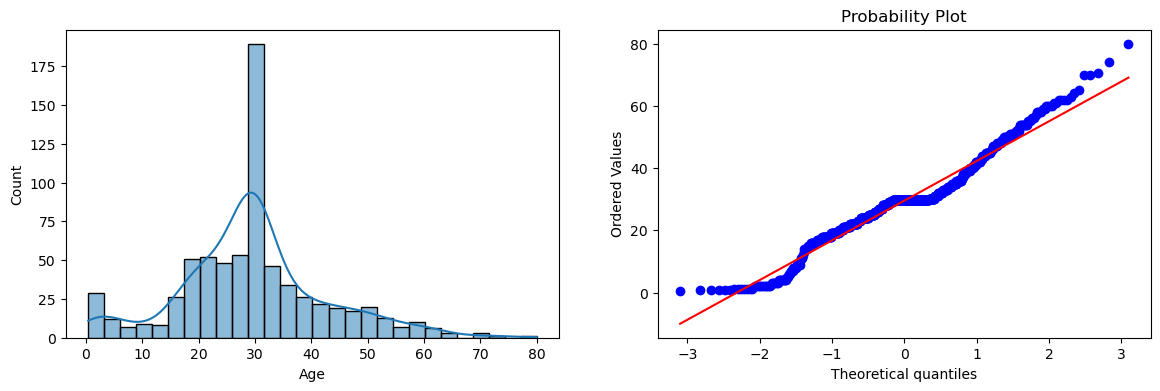

In [9]:
plt.figure(figsize=(14, 4))
plt.subplot(121)

sns.histplot(X_train['Age'], kde=True)

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)

plt.show()

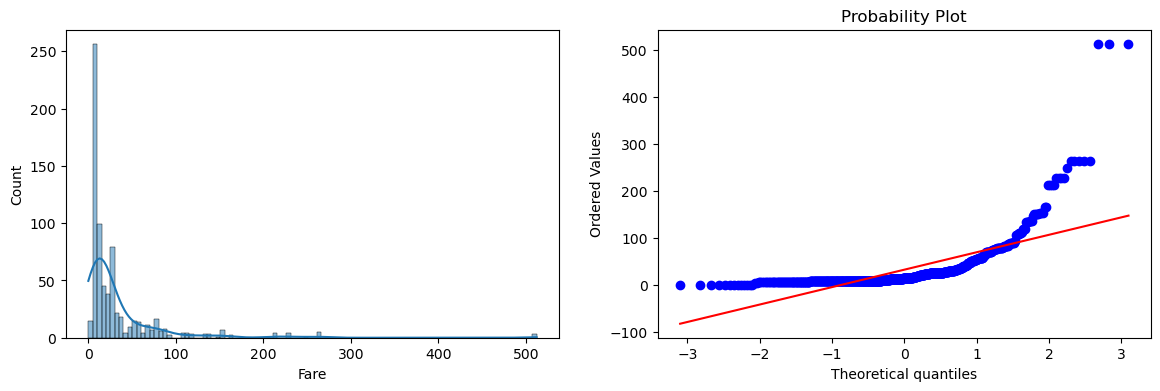

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(121)

sns.histplot(X_train['Fare'], kde=True)

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)

plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6480446927374302
Accuracy DT:  0.6815642458100558


# Function Transformer

In [14]:
trf = FunctionTransformer(func=np.log1p)  # applies log after adding 1 coz of 0 values

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6759776536312849


decision tree is not affected

In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, cv=10)))

LR 0.678027465667915
DT 0.6611111111111111


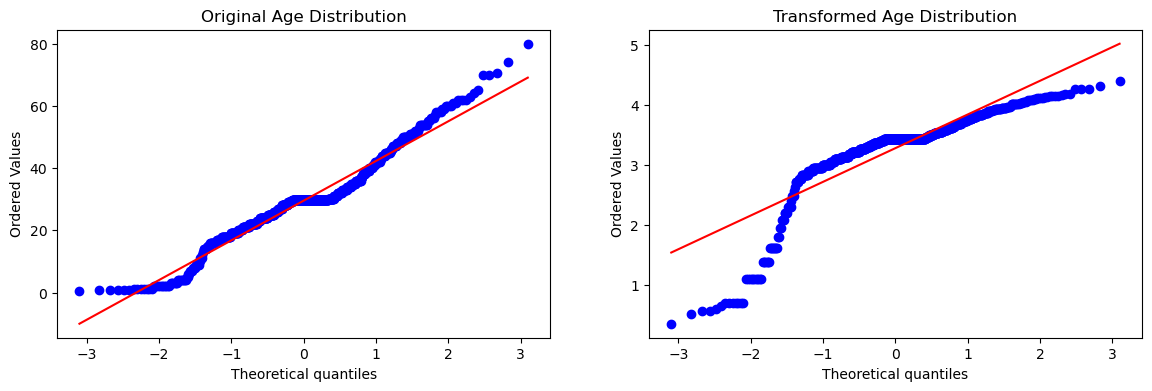

In [18]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Original Age Distribution')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Transformed Age Distribution')

plt.show()

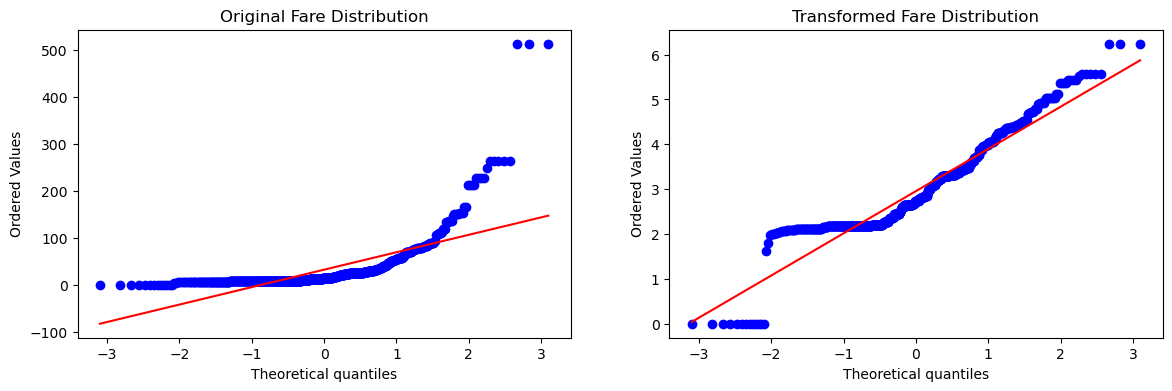

In [19]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Original Fare Distribution')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Transformed Fare Distribution')

plt.show()

age column is affected negatively coz it was not right skewed

In [20]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(func=np.log1p),['Fare'])
], remainder='passthrough')


X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DT:  0.664804469273743


In [22]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed2, y, cv=10)))

LR 0.6712609238451936
DT 0.6543570536828963


Age was almost normally distributed. Fare was right skewed hence we got to see the difference with that.

Decision Tree was not affected coz it doesnt care about the distrubution 

In [27]:
def apply_transform(transform):
    X = df.drop('Survived', axis=1)
    y = df['Survived']

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()
    print('Accuracy with transform:', np.mean(cross_val_score(clf, X_trans, y, cv=10)))


    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Original Fare Distribution')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title('Transformed Fare Distribution')

    plt.show()

Accuracy with transform: 0.61729088639201


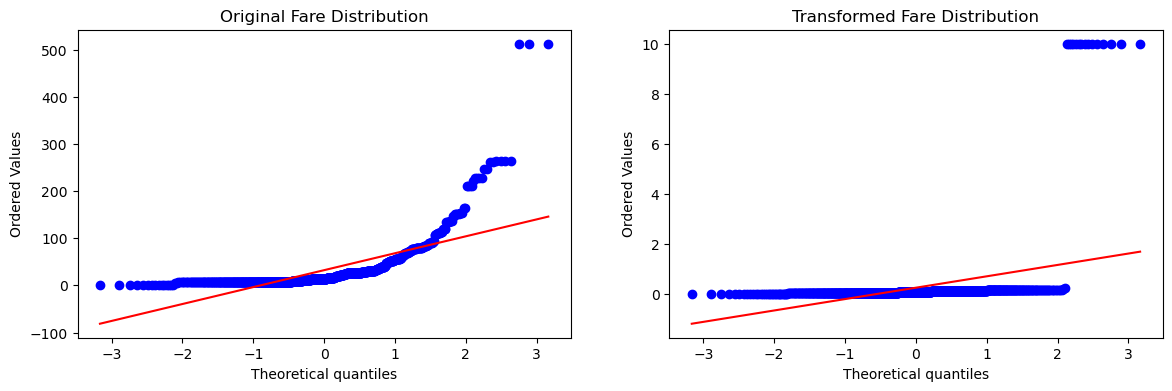

In [39]:
apply_transform(lambda x: 1/(x+0.1))  # Example transform: reciprocal + 0.1

Accuracy with transform: 0.6431335830212235


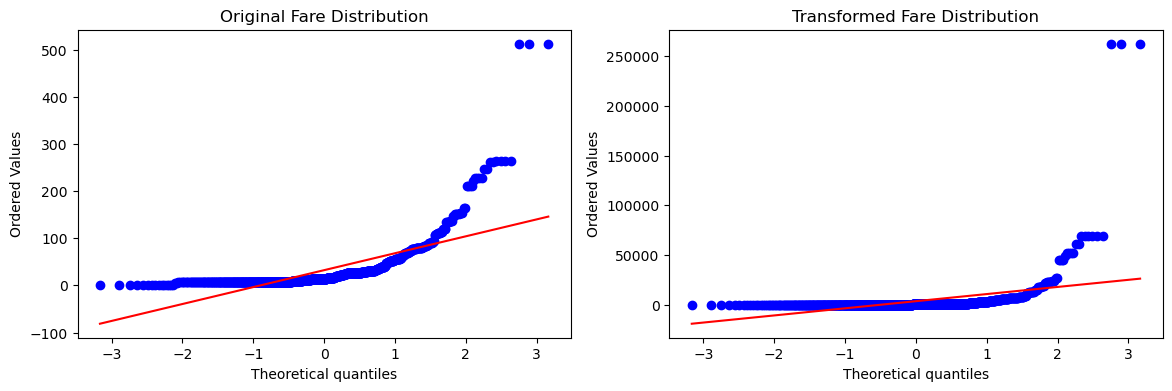

In [40]:
apply_transform(lambda x: x**2)  # Example transform: Square

Accuracy with transform: 0.6611485642946316


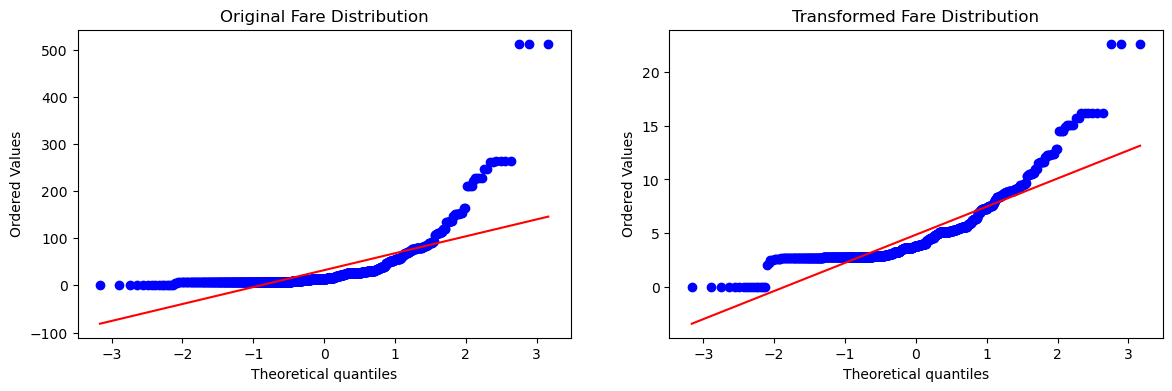

In [42]:
apply_transform(lambda x: x**0.5)  # transform: Square root

Accuracy with transform: 0.6262796504369538


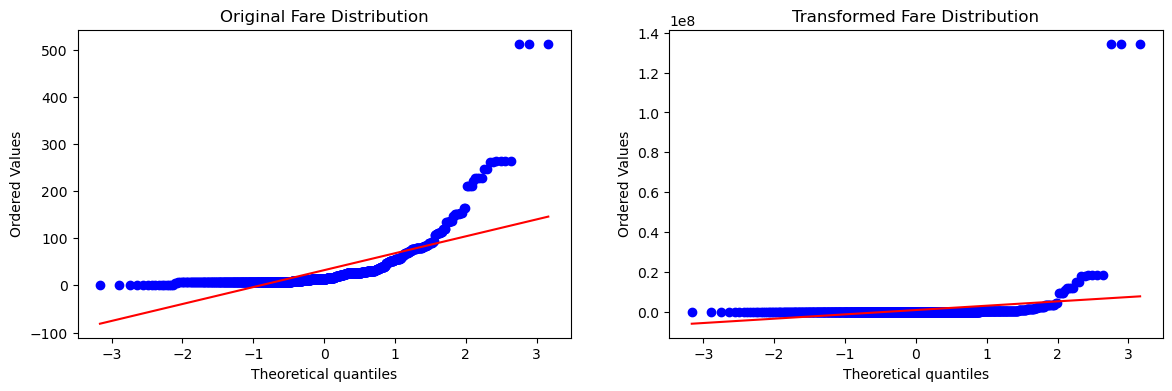

In [43]:
apply_transform(lambda x: x**3)  # Example transform: Cube

Accuracy with transform: 0.6195131086142323


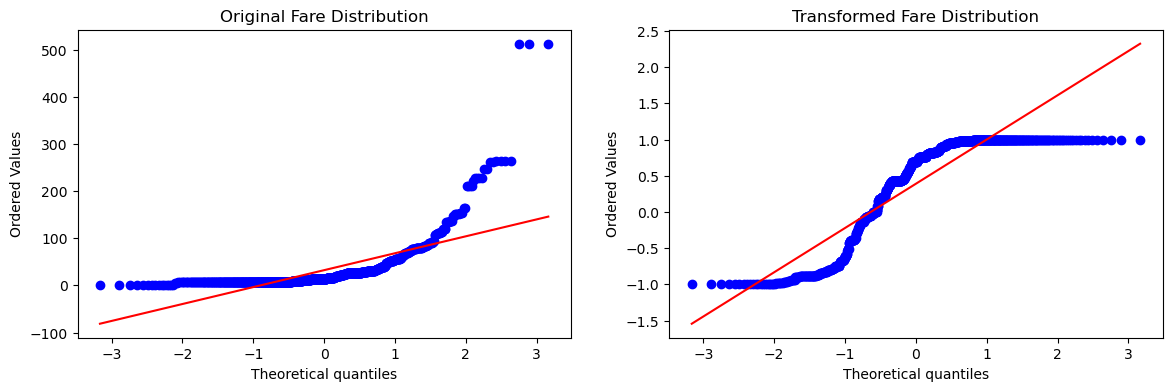

In [44]:
# custom function transform

apply_transform(np.sin)

Accuracy with transform: 0.616167290886392


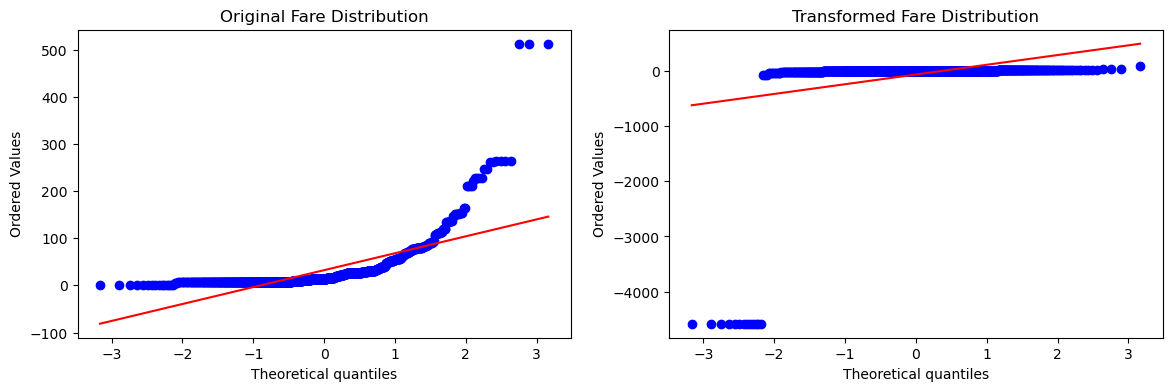

In [48]:
apply_transform(np.tan)